# Netowork Graph 

Let's try to use Python's NetworkX library to draw some networks. First we need to Import some stuff:

In [74]:
# for reading our twitter data
import json
import gzip

# for graphs
import networkx

# for display
import matplotlib.pyplot

Now let's create a function that we can give a filename of some tweets, which will read our twitter data and create a retweet network graph, where the nodes are users, and the edges replies.

In [71]:
def draw_graph(tweets, max_nodes=None):
    G = networkx.DiGraph()
    for line in gzip.open(tweets, 'rt'):
        tweet = json.loads(line)
        if not tweet.get('in_reply_to_screen_name'):
            continue
        G.add_edge(tweet['user']['screen_name'], tweet['in_reply_to_screen_name'])
        if max_nodes and len(G) > max_nodes:
            break
    pos = networkx.spring_layout(G)
    networkx.draw(G, pos, node_size=5)
    matplotlib.pyplot.show()

This is a magic command to get our visualization to display in the notebook.

In [72]:
%matplotlib inline

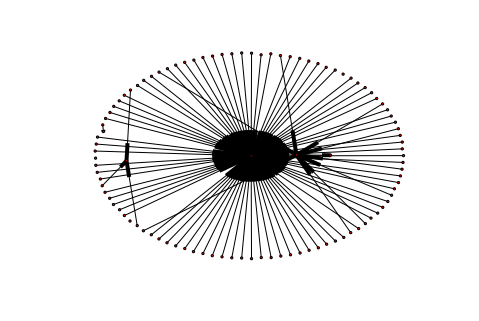

In [73]:
draw_graph("data/filters/fakePREMIS/author-mentions.json.gz", 100)

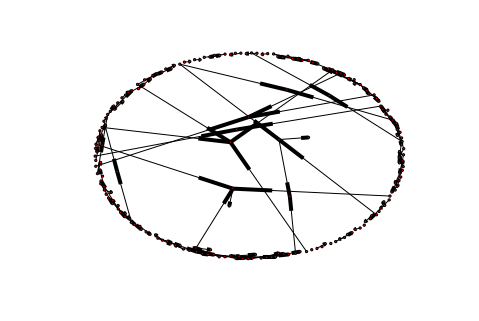

In [64]:
draw_graph('data/assorted/thisisacoup.json.gz', max_nodes=200)